<a href="https://colab.research.google.com/github/SetturaM/NANO-706-HW/blob/main/Nano706_Homework2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
from PIL import Image  # Import the Image module from Pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#MNIST classification using CNN model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.8893 - loss: 0.3581 - val_accuracy: 0.9828 - val_loss: 0.0593
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9826 - loss: 0.0549 - val_accuracy: 0.9867 - val_loss: 0.0472
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9882 - loss: 0.0387 - val_accuracy: 0.9839 - val_loss: 0.0547
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9924 - loss: 0.0253 - val_accuracy: 0.9876 - val_loss: 0.0430
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9886 - val_loss: 0.0438
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


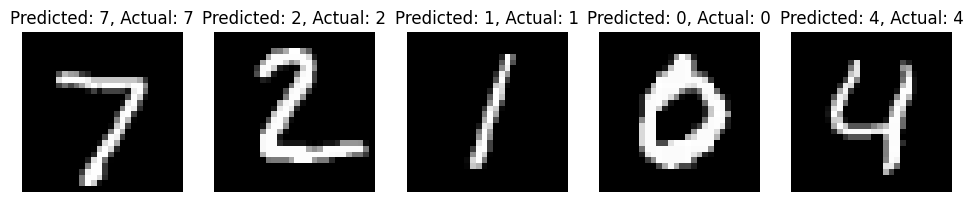

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the Data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Build a Simple CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Make Predictions on Test Set
predictions = model.predict(x_test)

# Display Sample Predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()


#Object Detection

In [ ]:
# Set up the environment
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install requirements

# Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5s model (small)


Cloning into 'yolov5'...
remote: Enumerating objects: 17639, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 17639 (delta 11), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17639/17639), 16.98 MiB | 24.48 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-10-27 Python-3.12.12 torch-2.8.0+cu126 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 151MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
pip install requests


In [ ]:
import requests

# Define the URL of the image
url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg'

# Send a GET request to the URL
response = requests.get(url)

# Open a file in binary write mode
with open('zidane.jpg', 'wb') as f:
    f.write(response.content)

print("Image downloaded successfully!")


Image downloaded successfully!


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-10-27 Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


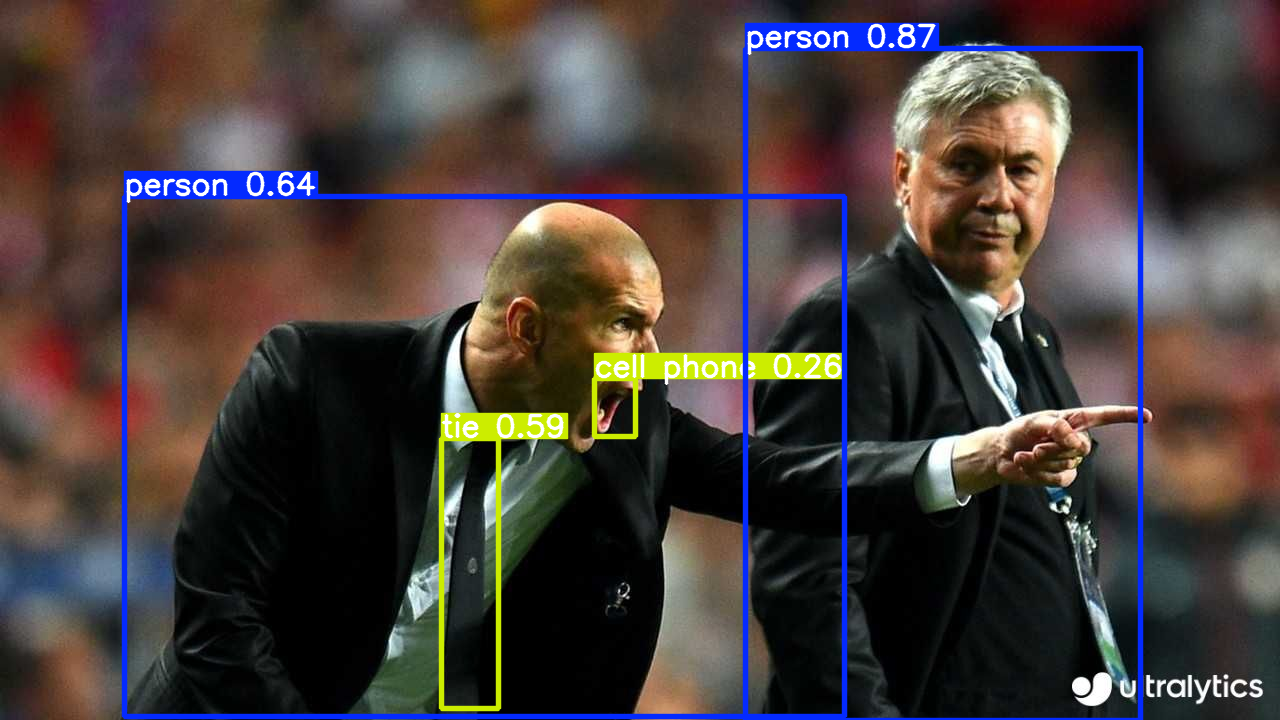

In [ ]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load the image
img = 'zidane.jpg'  # path to your image

# Perform inference
results = model(img)

# Show results
results.show()  # This will display the image with detections


In [ ]:
img_path = '/content/game of thrones.jpeg'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/game of thrones.jpeg'

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


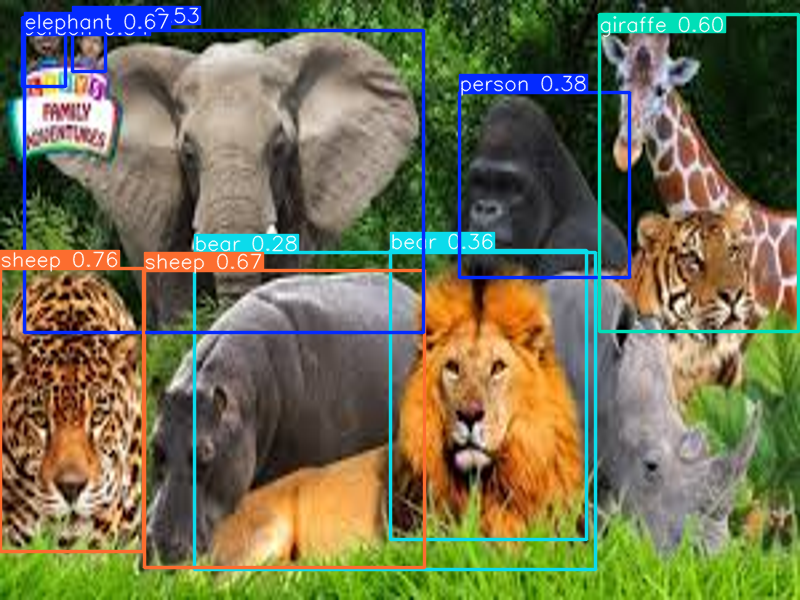

In [ ]:
img_path = '/content/animals.jpeg'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


#Segmentation

In [ ]:
pip install tensorflow tensorflow-datasets matplotlib numpy


#HomeWork2

Run this cell first to load the required dataset

In [16]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Preprocess the Data
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(np.uint8)  # Convert labels to integers

#  Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Part1 : In this section, we want to classify the MNIST dataset using Random Forest, Logistic Regression, and Neural Networks. We will print the accuracy for each model. The code for Random Forest will serve as an example, and you should complete the code for Logistic Regression and Neural Networks accordingly.

In [24]:
# Train Different Classifiers

# 1. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [25]:
# 2. Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

In [27]:
# 3. MLP (Neural Network)
mlp=MLPClassifier(hidden_layer_sizes=(128))
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

In [28]:
# Step 6: Print Accuracy Results
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(f'MLP Accuracy: {accuracy_mlp * 100:.2f}%')

Logistic Regression Accuracy: 92.02%
Random Forest Accuracy: 96.75%
MLP Accuracy: 97.86%


## Part2: take a photo of yourself, upload it to the jupyter notebook and detect your face using Yolo model

In [40]:
!pip install -q ultralytics supervision roboflow
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.predict(source='/content/IMG_4283.jpg', conf= 0.25)
for r in results:
    boxes = r.boxes

#Iterate through detected boxes filter for 'face' class
# Extract coordinates for drawing bounding boxes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.8 MB/s eta 0:00:00

image 1/1 /content/IMG_4283.jpg: 640x416 1 person, 1 cell phone, 186.8ms
Speed: 5.7ms preprocess, 186.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


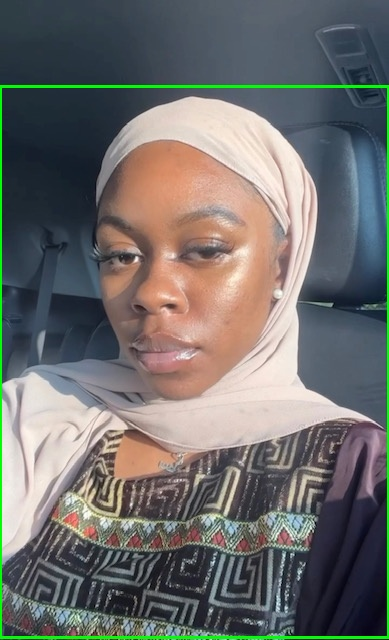

In [44]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
from IPython.display import display

# Load the image
img = cv2.imread('/content/IMG_4283.jpg')

# Check if any detections were made in the previous cell's 'results'
# Assuming 'results' and 'model' are available from the previous cell execution
if 'results' in locals() and results is not None and len(results) > 0:
    # Assuming we are working with the first image in the results
    r = results[0]
    boxes = r.boxes

    if boxes is not None and len(boxes) > 0:
        # Get the class IDs and bounding box coordinates
        class_ids = boxes.cls
        xyxy = boxes.xyxy

        # Define the class ID for 'person' (common in COCO dataset)
        # This might need adjustment based on the specific model used
        person_class_id = 0

        # Iterate through the detected boxes and draw bounding boxes around persons
        for i in range(len(boxes)):
            # Check if the detected object is a 'person'
            if class_ids[i] == person_class_id:
                x1, y1, x2, y2 = xyxy[i].tolist()

                # Draw bounding box
                color = (0, 255, 0) # Green color
                thickness = 2
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

        # Save the image with detections
        cv2.imwrite('image_with_detections.jpg', img)

        # Display the image with detections
        try:
            pil_img = Image.open('image_with_detections.jpg')
            display(pil_img)
        except Exception as e:
            print(f"Error displaying image: {e}")

    else:
        print("No objects detected in the image.")
else:
    print("Please run the previous cell to get detection results.")